In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Dans ce notebook, nous allons introduire l'analyse des séries temporelles. Une série temporelle est une série dont l'index est le temps. Un exemple de série temporelle est par exemple, la température d'un pays sur une année, le prix du bitcoin ces 6 derniers mois. Ces valeurs diminuent ou augmentent en fonction du temps. Les analyser nous permet donc d'identifier les tendances, la saisonabilité et plus encore.

Pour ce projet, nous allons utiliser des données de consommation d'énergie electrique et également de production en énergie solaire et éolienne en Allemagne de 2006 à 2017

In [13]:
energy = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [14]:
energy.shape

(4383, 5)

In [15]:
energy.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
4341,2017-11-20,1565.56805,380.284,14.922,395.206
3172,2014-09-08,1397.91000,47.111,125.692,172.803
1054,2008-11-20,1587.90000,NaN,NaN,NaN
1291,2009-07-15,1262.80900,NaN,NaN,NaN
3527,2015-08-29,1164.63600,40.847,172.194,213.041


In [16]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [17]:
energy['Date']

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
5       2006-01-06
6       2006-01-07
7       2006-01-08
8       2006-01-09
9       2006-01-10
10      2006-01-11
11      2006-01-12
12      2006-01-13
13      2006-01-14
14      2006-01-15
15      2006-01-16
16      2006-01-17
17      2006-01-18
18      2006-01-19
19      2006-01-20
20      2006-01-21
21      2006-01-22
22      2006-01-23
23      2006-01-24
24      2006-01-25
25      2006-01-26
26      2006-01-27
27      2006-01-28
28      2006-01-29
29      2006-01-30
           ...    
4353    2017-12-02
4354    2017-12-03
4355    2017-12-04
4356    2017-12-05
4357    2017-12-06
4358    2017-12-07
4359    2017-12-08
4360    2017-12-09
4361    2017-12-10
4362    2017-12-11
4363    2017-12-12
4364    2017-12-13
4365    2017-12-14
4366    2017-12-15
4367    2017-12-16
4368    2017-12-17
4369    2017-12-18
4370    2017-12-19
4371    2017-12-20
4372    2017-12-21
4373    2017-12-22
4374    2017

In [18]:
energy['Date'] = pd.to_datetime(energy['Date'])

In [19]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null datetime64[ns]
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [20]:
energy = energy.set_index('Date')

In [21]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Proportion de valeurs manquantes

In [22]:
energy.isnull().mean()

Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
dtype: float64

In [23]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [24]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [25]:
energy.index[:5].year

Int64Index([2006, 2006, 2006, 2006, 2006], dtype='int64', name='Date')

In [26]:
energy.index[:5].month

Int64Index([1, 1, 1, 1, 1], dtype='int64', name='Date')

In [27]:
energy.index[:5].day

Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Date')

In [28]:
energy.index[:5].day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

Création de colonnes (features) relatives à la date : 

In [29]:
energy['Year'] = energy.index.year

In [30]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


In [31]:
energy.Year.value_counts()

2016    366
2012    366
2008    366
2015    365
2011    365
2007    365
2014    365
2010    365
2006    365
2017    365
2013    365
2009    365
Name: Year, dtype: int64

In [32]:
energy['Month'] = energy.index.month
energy['day_name'] = energy.index.day_name()

In [33]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


In [35]:
energy['is_weekend'] = energy.day_name.isin(["Sunday", "Saturday"])

In [39]:
energy.day_name == 'Saturday' |   energy.day_name == 'Sunday'

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

Quick tip  : 

In [ ]:
x = 2
if x == 5 or x ==9 or x == 12:
  pass

if x in [5, 9, 12]

In [ ]:
(energy.day_name == 'Saturday') &   (energy.day_name == 'Sunday')

Date
2006-01-01    False
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: day_name, Length: 4383, dtype: bool

In [40]:
energy

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,False
2006-01-06,1403.42700,NaN,NaN,NaN,2006,1,Friday,False
2006-01-07,1300.28700,NaN,NaN,NaN,2006,1,Saturday,True
2006-01-08,1207.98500,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-09,1529.32300,NaN,NaN,NaN,2006,1,Monday,False


In [41]:
energy.Year.max()

2017

In [42]:
energy.loc["2016-12-23": "2016-12-28"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-12-23,1415.811,395.296,16.111,411.407,2016,12,Friday,False
2016-12-24,1195.354,681.509,12.843,694.352,2016,12,Saturday,True
2016-12-25,1117.673,719.778,6.608,726.386,2016,12,Sunday,True
2016-12-26,1121.213,718.160,15.463,733.623,2016,12,Monday,False
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False


## Consommation en énergie au fil des années

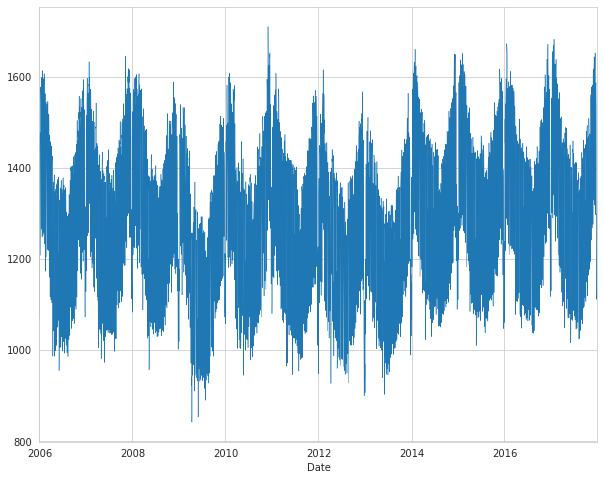

In [44]:
sns.set_style("whitegrid")
energy['Consumption'].plot(linewidth=.5, figsize=(10, 8))
plt.show()

## Quel est le jour avec le plus de consommation en global?

In [45]:
# Jour avec le plus de consommation
energy.groupby('day_name').sum()['Consumption'].sort_values()

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

In [58]:
groupday = energy.groupby('day_name').sum()['Consumption'].reset_index()
groupday

,day_name,Consumption
0,Friday,873034.67157
1,Monday,870006.24492
2,Saturday,751544.19949
3,Sunday,691646.51735
4,Thursday,889645.06681
5,Tuesday,894101.79246
6,Wednesday,897437.69479


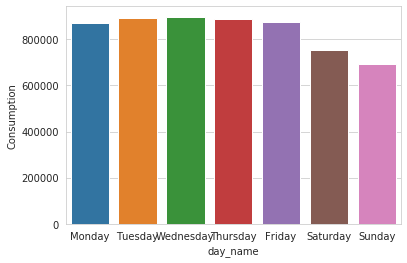

In [60]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = groupday['day_name'], y = groupday['Consumption'], order=order)
plt.show()

In [ ]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Consommation par année

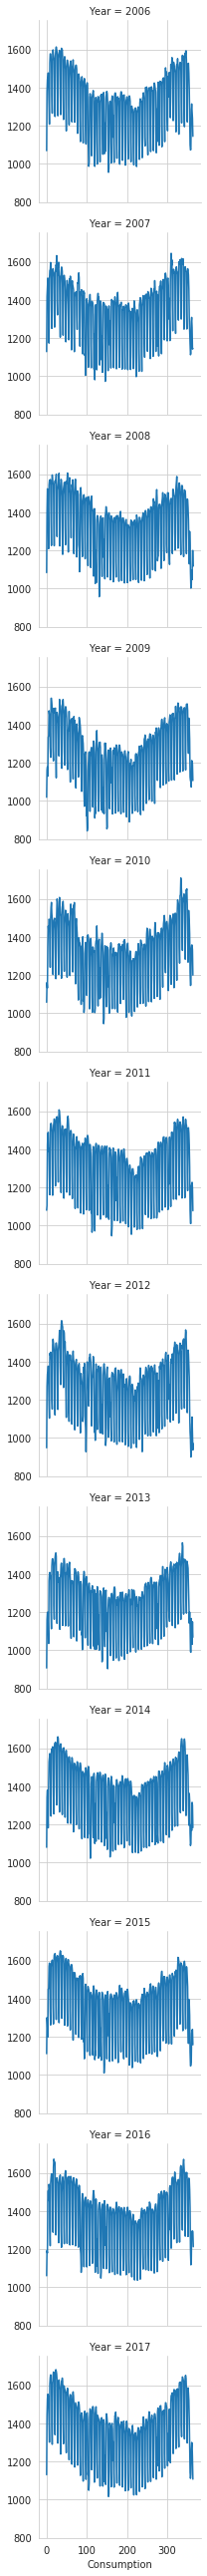

In [50]:
grid = sns.FacetGrid(energy, row="Year")
grid.map(plt.plot,'Consumption')

In [71]:
data = energy.loc['2016'].copy()

In [72]:
data

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,Friday,False
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,Saturday,True
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,Sunday,True
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,Monday,False
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,Tuesday,False
2016-01-06,1454.685,156.044,12.595,168.639,2016,1,Wednesday,False
2016-01-07,1540.304,313.603,14.638,328.241,2016,1,Thursday,False
2016-01-08,1515.840,460.876,40.969,501.845,2016,1,Friday,False
2016-01-09,1311.996,205.629,23.891,229.520,2016,1,Saturday,True


In [78]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [75]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

(735964.0, 736329.0)

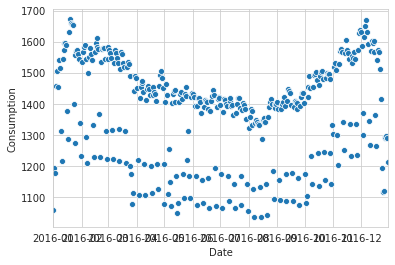

In [86]:
sns.scatterplot( x = data.index, y=data['Consumption'])
plt.xlim(data.index.min(), data.index.max())

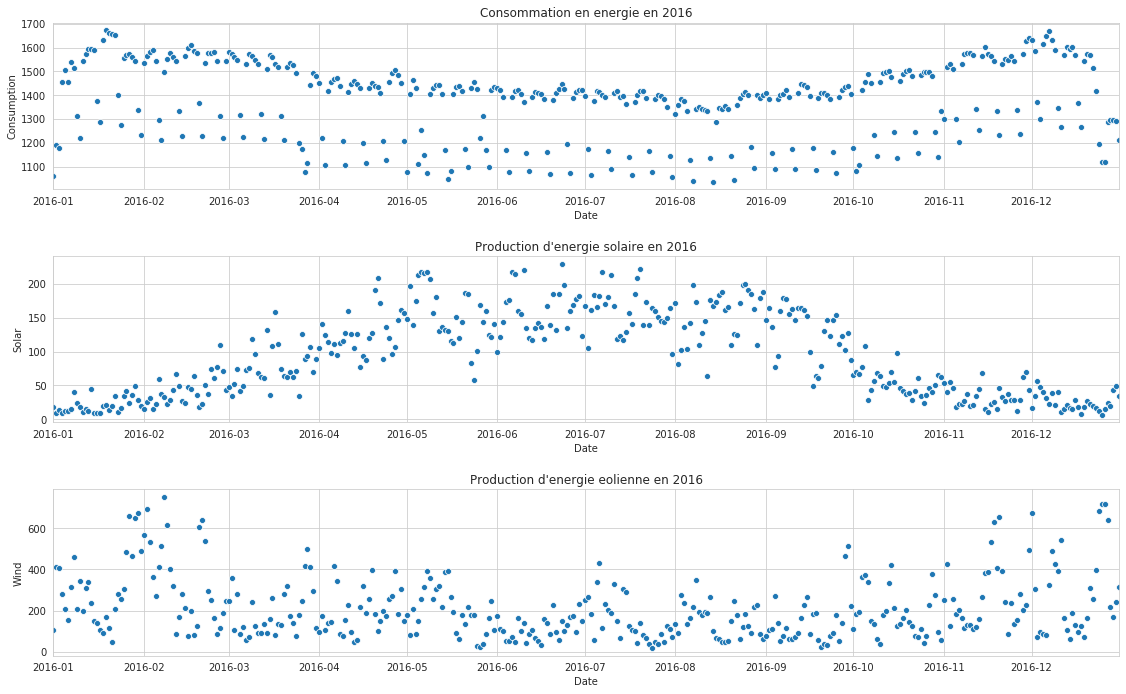

In [85]:
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)

sns.scatterplot(data =data, x = data.index, y='Consumption', ax=axes[0])
axes[0].set_title('Consommation en energie en 2016')
axes[0].set_xlim(data.index.min(), data.index.max())
 
sns.scatterplot(data =data, x = data.index, y='Solar',ax=axes[1])
axes[1].set_title("Production d'energie solaire en 2016")
axes[1].set_xlim(data.index.min(), data.index.max())

sns.scatterplot(data =data, x = data.index, y='Wind',ax=axes[2])
axes[2].set_title("Production d'energie eolienne en 2016")
axes[2].set_xlim(data.index.min(), data.index.max())
fig.tight_layout(pad=2)

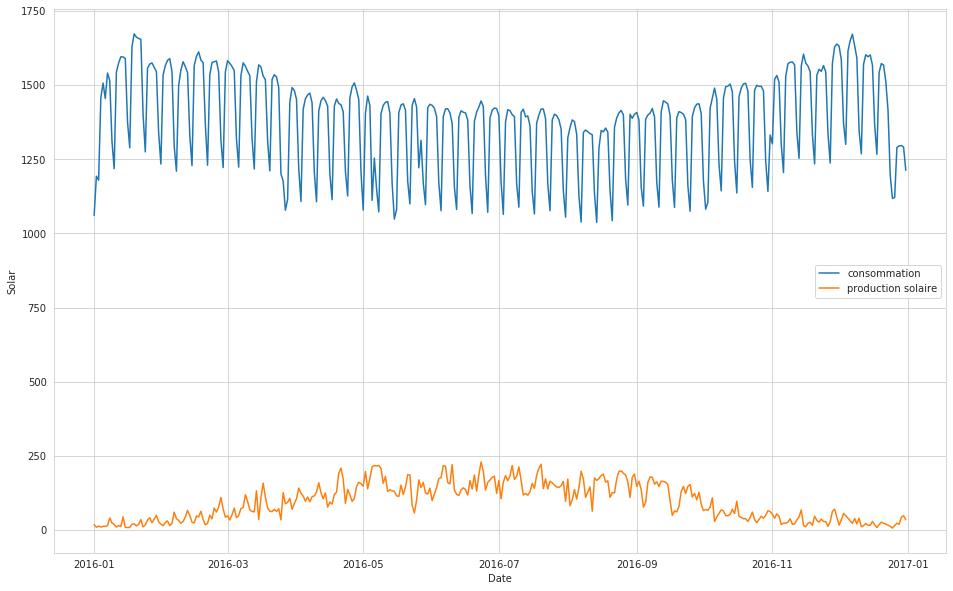

In [87]:
fig, ax = plt.subplots(figsize=(16, 10), nrows=1, ncols=1)
sns.lineplot(data =data, x = data.index, y='Consumption', ax=ax, legend='brief', label='consommation')

 
sns.lineplot(data =data, x = data.index, y='Solar',ax=ax, legend='brief', label='production solaire')


# sns.scatterplot(data =data_2016, x = data.index, y='Wind',ax=axes[2])
# axes[2].set_title("Production d'energie eolienne en 2016")
# fig.tight_layout(pad=2)

In [88]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

## Consommation par mois

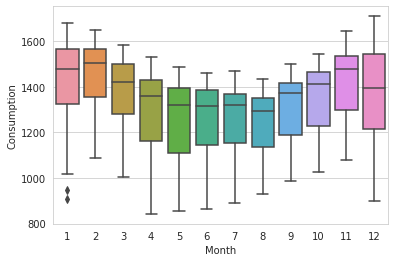

In [89]:
sns.boxplot(data=energy, x="Month", y='Consumption')

In [90]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

In [91]:
energy["day_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

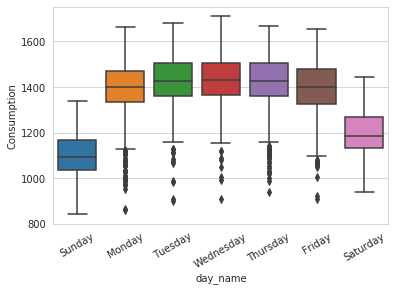

In [92]:
g = sns.boxplot(data=energy, x="day_name", y='Consumption')
g.set_xticklabels(rotation=30, labels=energy["day_name"].unique())
plt.show()

## Consommation en semaine vs Weekend

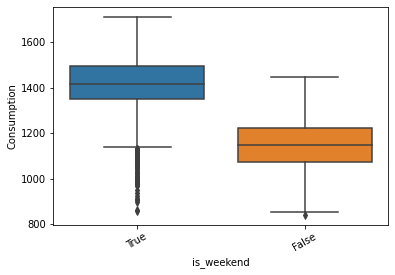

In [ ]:
g = sns.boxplot(data=energy, x="is_weekend", y='Consumption')
g.set_xticklabels(rotation=30, labels=energy["is_weekend"].unique())
plt.show()

# Resampling

## Consommation par semaine

In [ ]:
energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('W').mean()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


## Consommation en moyenne par mois

In [ ]:
conso_par_mois = energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('M').sum()
conso_par_mois

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.70400,0.000,0.000,0.000
2006-02-28,41078.99300,0.000,0.000,0.000
2006-03-31,43978.12400,0.000,0.000,0.000
2006-04-30,38251.76700,0.000,0.000,0.000
2006-05-31,38858.14300,0.000,0.000,0.000
...,...,...,...,...
2017-08-31,40029.77368,5499.798,4602.808,10102.606
2017-09-30,40078.56092,6287.730,3079.291,9367.021
2017-10-31,42355.21893,12480.097,2130.557,14610.654


## Consommation par trimestre

In [ ]:
 energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('Q').sum()


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-03-31,130361.82100,0.000,0.000,0.000
2006-06-30,114363.36000,0.000,0.000,0.000
2006-09-30,116664.13500,0.000,0.000,0.000
2006-12-31,127679.22000,0.000,0.000,0.000
2007-03-31,129072.56700,0.000,0.000,0.000
2007-06-30,116357.37300,0.000,0.000,0.000
2007-09-30,119972.07200,0.000,0.000,0.000
2007-12-31,131229.83500,0.000,0.000,0.000
2008-03-31,131525.92900,0.000,0.000,0.000
